In [1]:
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'

import pymc3 as pm

### Pre Processing

In [4]:
import numpy as np
import pandas as pd
import missingno as msno
from sklearn.impute import SimpleImputer
from patsy import demo_data

In [7]:
df = pd.read_csv("Lawsuit.csv")

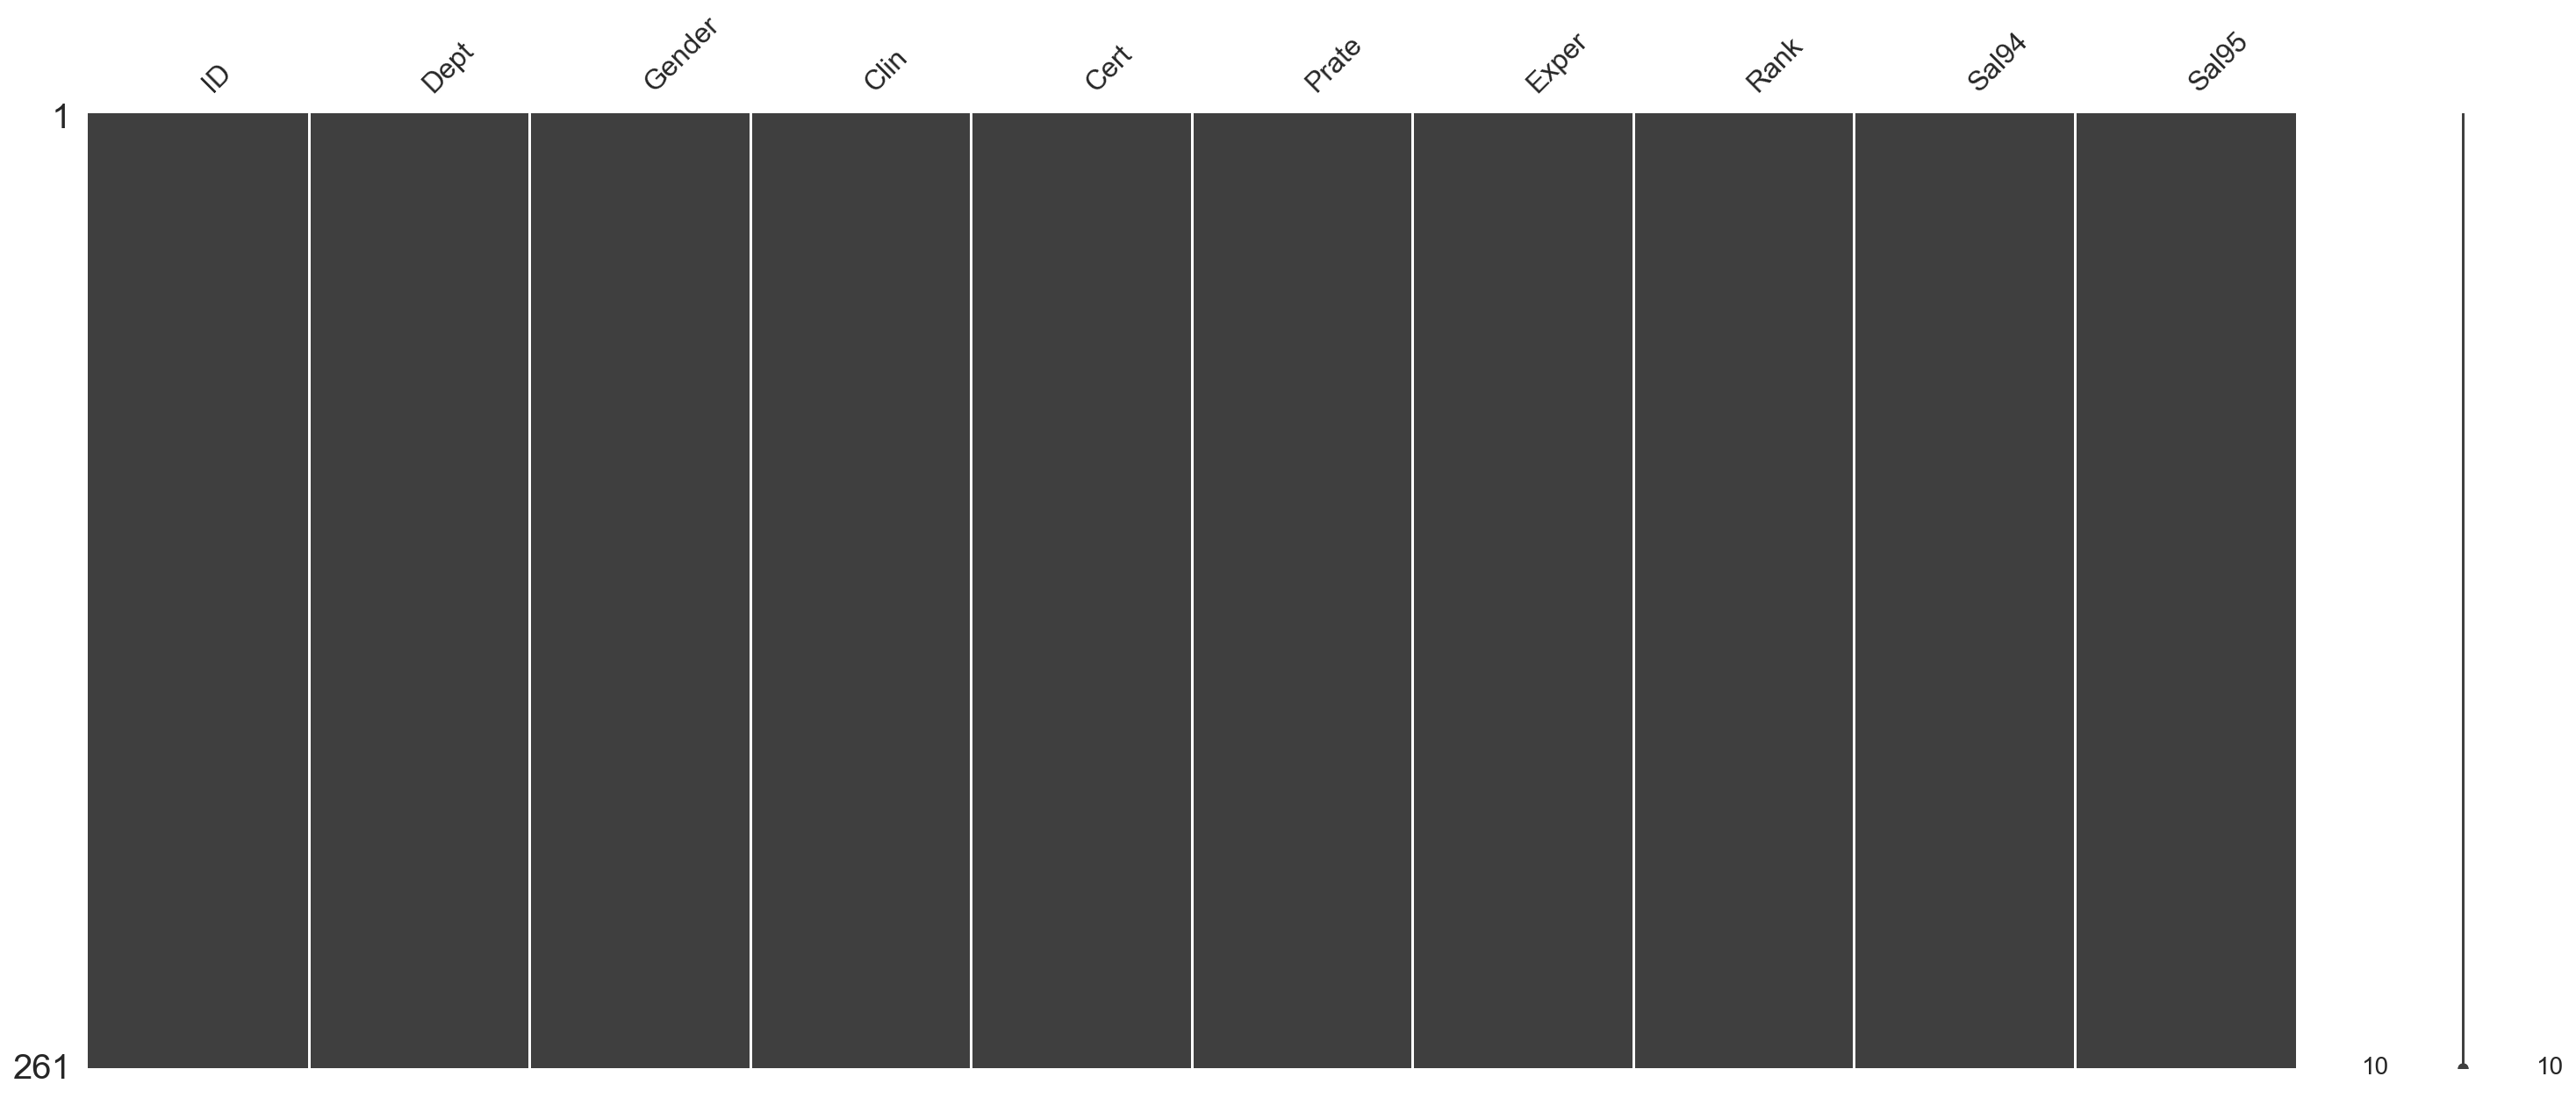

In [8]:
msno.matrix(df)
plt.show()

<AxesSubplot:>

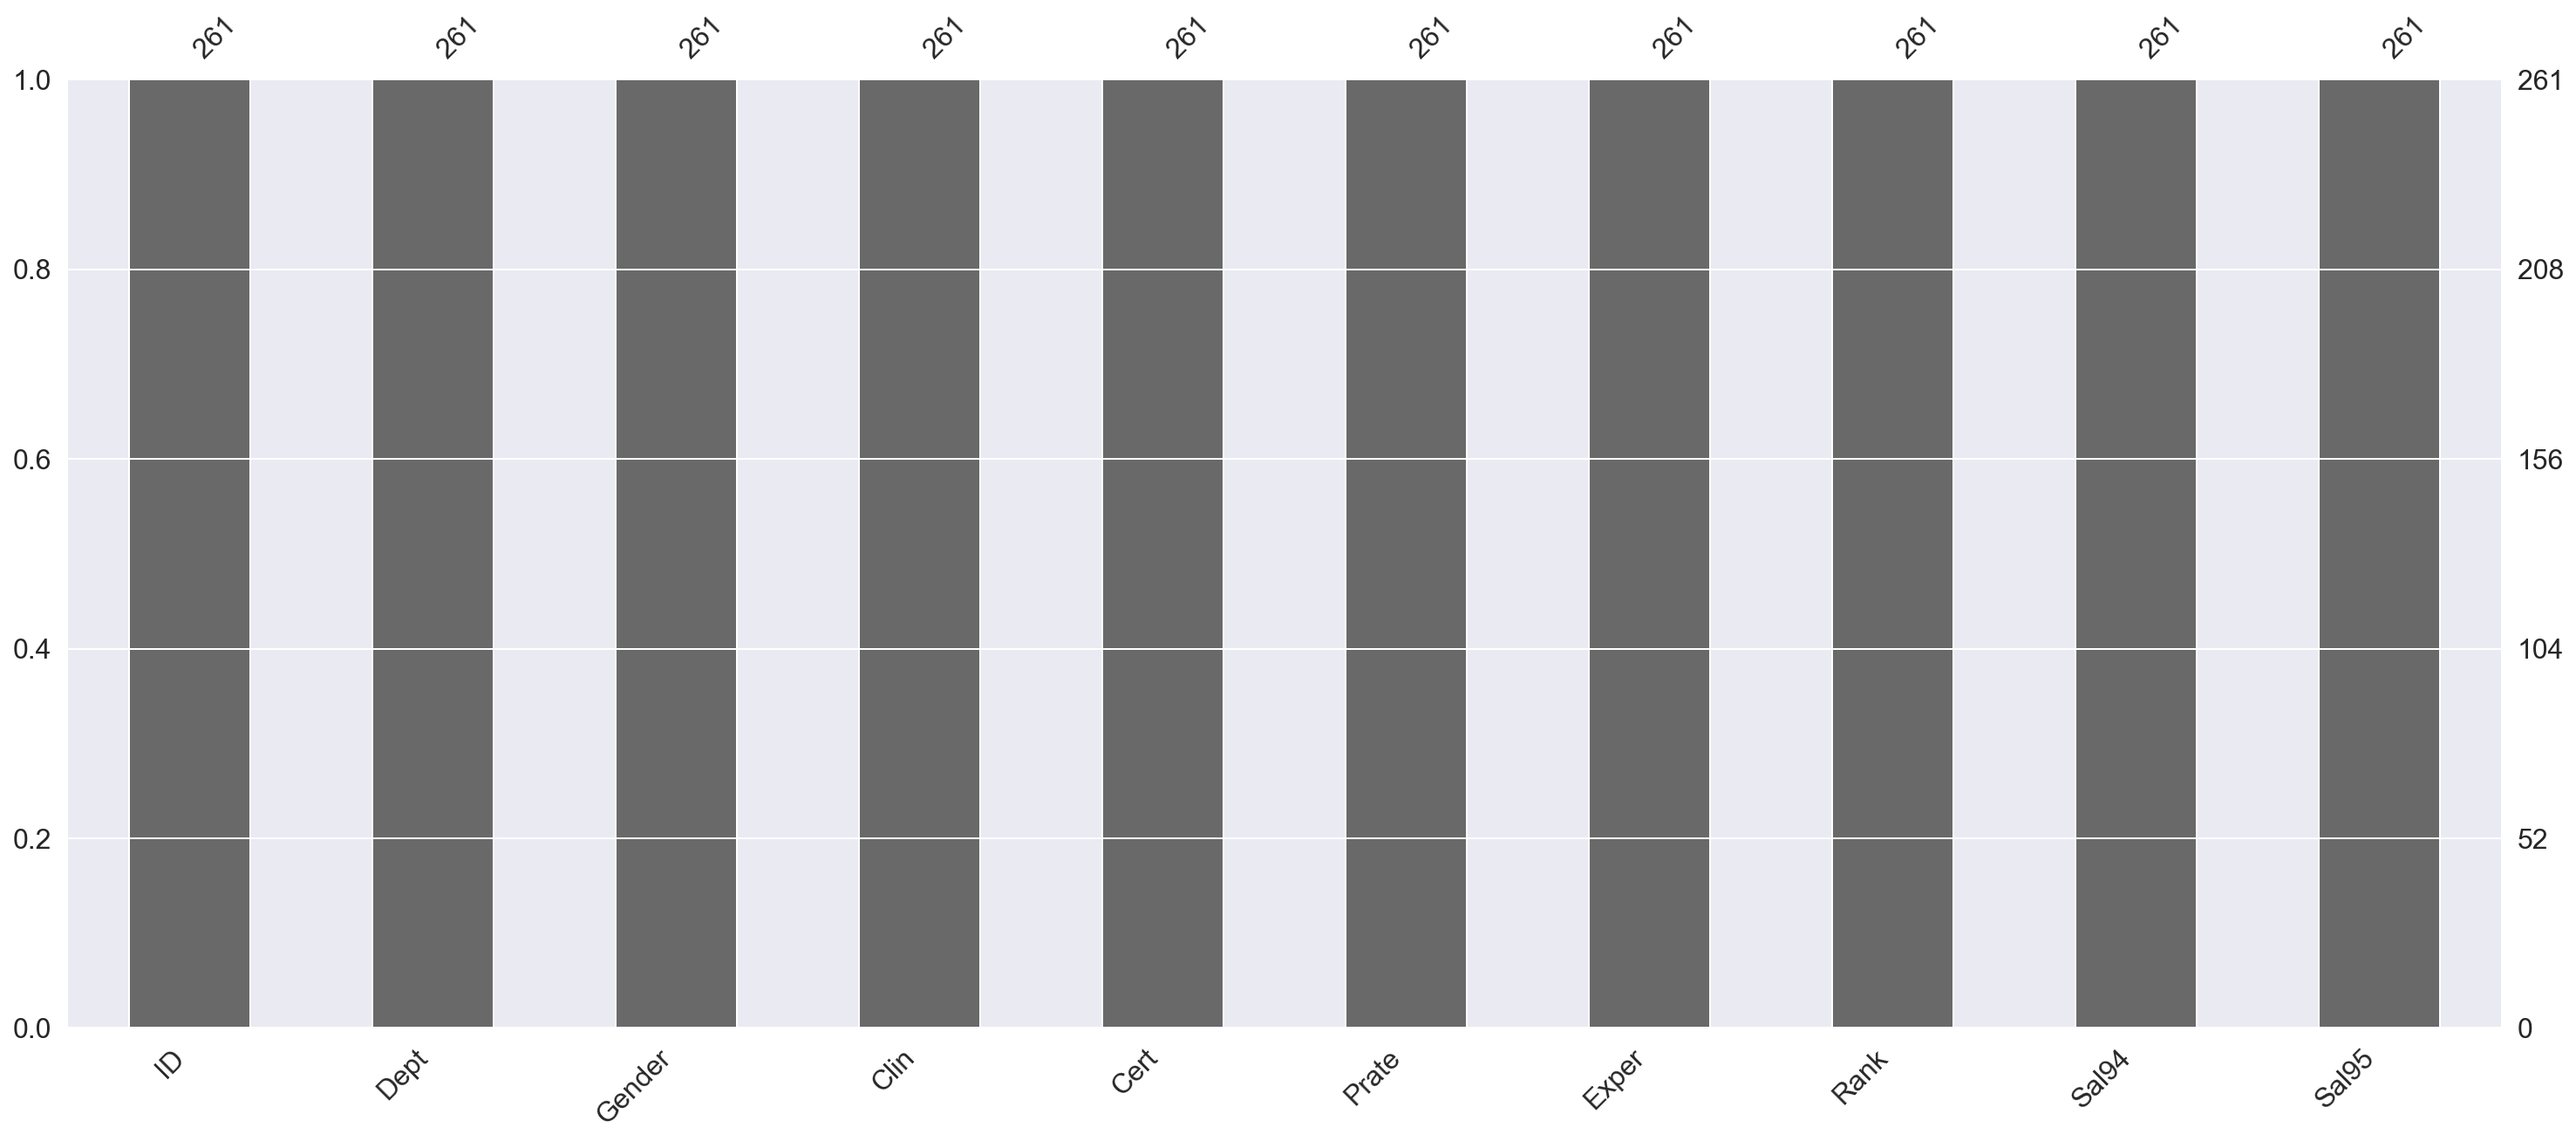

In [9]:
msno.bar(df)

In [14]:
df.isna().sum()

ID        0
Dept      0
Gender    0
Clin      0
Cert      0
Prate     0
Exper     0
Rank      0
Sal94     0
Sal95     0
dtype: int64

#### Nothing to do

In [19]:
colnames = df.columns
colnames

Index(['ID', 'Dept', 'Gender', 'Clin', 'Cert', 'Prate', 'Exper', 'Rank',
       'Sal94', 'Sal95'],
      dtype='object')

In [524]:
df['Gender']==1

0       True
1       True
2       True
3       True
4       True
       ...  
256    False
257    False
258    False
259    False
260    False
Name: Gender, Length: 261, dtype: bool

In [527]:
dept_man = df.loc[df['Gender']==1, colnames[3]]

In [528]:
dept_man = df.loc[df['Gender']==1, 'Dept']
dept_woman = df.loc[df['Gender']==0, 'Dept']
# gender = df[colnames[2]]
clin_man = df.loc[df['Gender']==1, colnames[3]]
clin_woman = df.loc[df['Gender']==0, colnames[3]]

cert_man = df.loc[df['Gender']==1, colnames[4]]
cert_woman = df.loc[df['Gender']==0, colnames[4]]

prate_man = df.loc[df['Gender']==1, colnames[5]]
prate_woman = df.loc[df['Gender']==0, colnames[5]]


exper_man = df.loc[df['Gender']==1, colnames[6]]
exper_woman = df.loc[df['Gender']==0, colnames[6]]

### Exper Column

In [461]:
exper.shape[0]

261

In [465]:
np.unique(exper)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 21, 22, 23, 24, 25, 26, 27, 32, 37])

In [488]:
exper.value_counts().index

Int64Index([ 5, 10,  8,  6,  9,  7, 11, 14,  4, 16, 12,  2, 15, 13,  3, 18, 27,
            21, 23, 25, 37, 17, 19, 22,  1, 32, 24, 26],
           dtype='int64')

In [529]:
exper_man_p = exper_man.value_counts()/exper_man.shape[0]
exper_woman_p = exper_woman.value_counts()/exper_woman.shape[0]

In [497]:
exper_man_samples = np.random.choice(a=exper_man_p.index, size=5220, p=exper_man_p)
exper_woman_samples = np.random.choice(a=exper_woman_p.index, size=5220, p=exper_woman_p)
exper_sample[100:150]

array([ 6, 10,  9,  5, 15, 16, 10,  6, 27,  5,  9,  5, 18,  8,  9,  5, 12,
        5, 10,  9,  8, 15,  5,  6,  7,  9,  9, 10, 10,  5, 16, 27, 16,  6,
       11,  6, 16, 18,  8, 11, 15, 14, 10, 14, 16, 25, 12, 13, 25, 18])

#### Cert Column

In [34]:
# inference to Bernoulli
np.unique(cert)

array([0, 1])

In [ ]:
[(cert.shape[0]-sum(cert))/cert.shape[0], sum(cert)/cert.shape[0]]

In [433]:
cert_sample = np.random.choice(a=[0, 1], size=5220, p=[(cert.shape[0]-sum(cert))/cert.shape[0], sum(cert)/cert.shape[0]])       
cert_sample[100:150]

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0])

#### Gender Column

In [31]:
# inference to Bernoulli
np.unique(gender)

array([0, 1])

In [432]:
[(gender.shape[0]-sum(gender))/gender.shape[0], sum(gender)/gender.shape[0]]

[0.4061302681992337, 0.5938697318007663]

In [427]:
gender_sample = np.random.choice(a=[0, 1], size=5220, p=[(gender.shape[0]-sum(gender))/gender.shape[0], sum(gender)/gender.shape[0]])       
gender_sample[100:150]

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0])

#### Clin Column

In [428]:
# inference to Bernoulli
np.unique(clin)

array([0, 1])

In [429]:
clin.shape[0]

261

In [430]:
[(clin.shape[0]-sum(clin))/clin.shape[0], sum(clin)/clin.shape[0]]

[0.38697318007662834, 0.6130268199233716]

In [431]:
clin_sample = np.random.choice(a=[0, 1], size=5220, p=[(clin.shape[0]-sum(clin))/clin.shape[0], sum(clin)/clin.shape[0]])       
clin_sample[100:150]

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0])

#### Dept Column

inference to category distribution

In [46]:
np.unique(dept)

array([1, 2, 3, 4, 5, 6])

In [58]:
dept = pd.DataFrame(dept)
dept.columns

Index(['Dept'], dtype='object')

In [59]:
dept['Dept'] = df.Dept.astype('str')

In [63]:
dept_encoded = pd.get_dummies(dept)

In [315]:
dept_encoded

Dept_1  Dept_2  Dept_3  Dept_4  Dept_5  Dept_6
0         1       0       0       0       0       0
1         1       0       0       0       0       0
2         1       0       0       0       0       0
3         1       0       0       0       0       0
4         1       0       0       0       0       0
..      ...     ...     ...     ...     ...     ...
256       0       0       0       0       0       1
257       0       0       0       0       0       1
258       0       0       0       0       0       1
259       0       0       0       0       0       1
260       0       0       0       0       0       1

[261 rows x 6 columns]

In [395]:
preal=[round(i, 2) for i in dept_encoded.apply(sum)/260]

In [400]:
dept_sample = np.random.choice(a=[1, 2, 3, 4, 5, 6], size=5220, p=preal)       

In [401]:
dept_sample

array([4, 4, 4, ..., 6, 1, 5])

In [402]:
np.unique(dept_sample)

array([1, 2, 3, 4, 5, 6])

#### Prate Column

sampling with Gaussian Mixture model

In [85]:
import arviz as az

In [35]:
np.unique(prate)

array([1.3, 1.9, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1,
       3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4,
       4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7,
       5.8, 5.9, 6. , 6.1, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1,
       7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.3, 8.4, 8.5,
       8.6, 8.7])

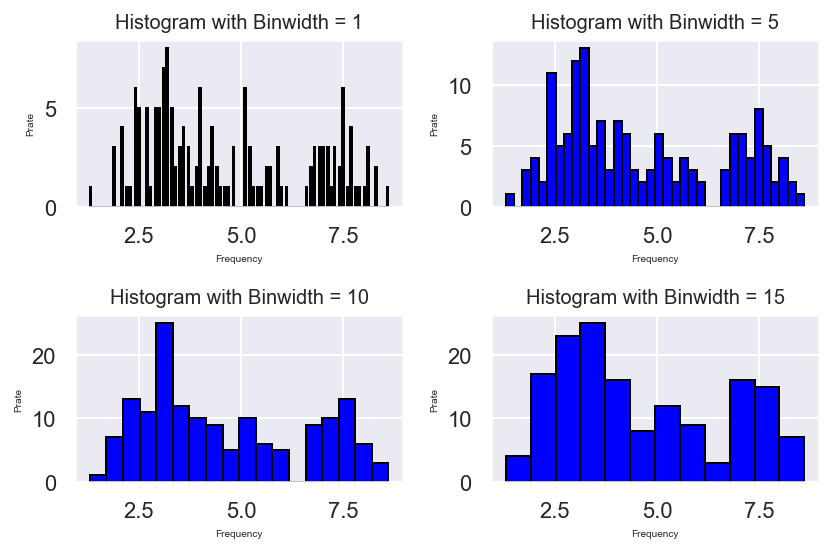

In [530]:
for i, binwidth in enumerate([1, 5, 10, 15]):

    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(prate_man, bins = int(180/binwidth),
             color = 'blue', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 10)
    ax.set_xlabel('Frequency', size = 5)
    ax.set_ylabel('Prate', size= 5)

plt.tight_layout()
plt.show()

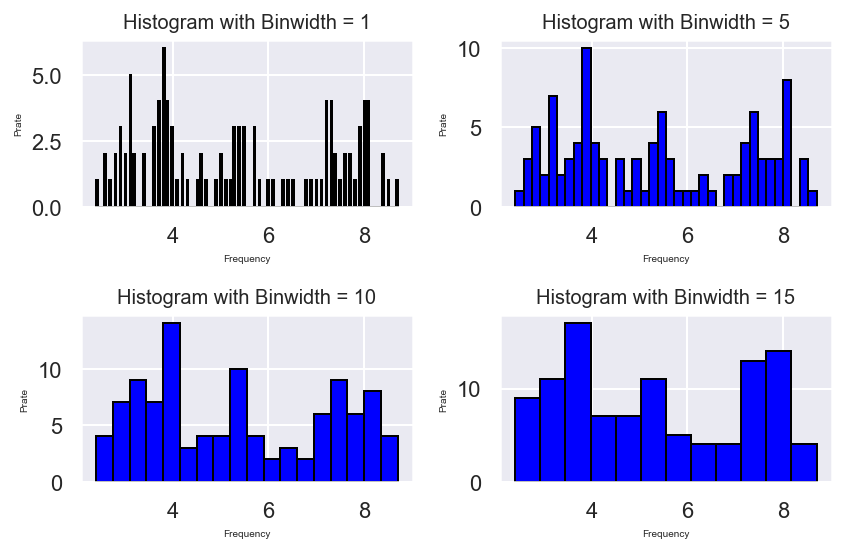

In [531]:
for i, binwidth in enumerate([1, 5, 10, 15]):

    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(prate_woman, bins = int(180/binwidth),
             color = 'blue', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 10)
    ax.set_xlabel('Frequency', size = 5)
    ax.set_ylabel('Prate', size= 5)

plt.tight_layout()
plt.show()

In [376]:
with pm.Model() as model:
    w = pm.Dirichlet("w", [1., 1.])
    mu = pm.Normal("mu", 0.0, 10.0, shape=2)
    tau = pm.Gamma("tau", 1.0, 1.0, shape=2)

    x_obs = pm.NormalMixture("x_obs", w, mu, tau=tau, observed=prate)

In [377]:
with model:
    start = pm.find_MAP()
    step = pm.NUTS()
    trace = pm.sample(5, step=step, start=start)
    

    # sample posterior predictive samples
    ppc_trace = pm.sample_posterior_predictive(trace, var_names=["x_obs"])
    print(ppc_trace['x_obs'].shape)

    # Get an arviz inference object
    idata_pymc3 = az.from_pymc3(trace, posterior_predictive=ppc_trace)

Only 5 samples in chain.
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [tau, mu, w]


Sampling 4 chains for 1_000 tune and 5 draw iterations (4_000 + 20 draws total) took 18 seconds.


(20, 261)


In [304]:
pm.summary(trace)

/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
mu[0]   6.578  1.634   3.741    7.600      0.372    0.267      19.0      19.0   
mu[1]   4.763  1.621   3.736    7.548      0.369    0.265      19.0      19.0   
w[0]    0.405  0.181   0.272    0.721      0.041    0.030      19.0      16.0   
w[1]    0.595  0.181   0.279    0.728      0.041    0.030      19.0      16.0   
tau[0]  2.363  1.058   0.648    3.839      0.241    0.173      19.0      16.0   
tau[1]  1.354  1.022   0.617    3.179      0.233    0.167      19.0      19.0   

        r_hat  
mu[0]    1.91  
mu[1]    1.41  
w[0]     1.47  
w[1]     1.47  
tau[0]   1.69  
tau[1]   1.51

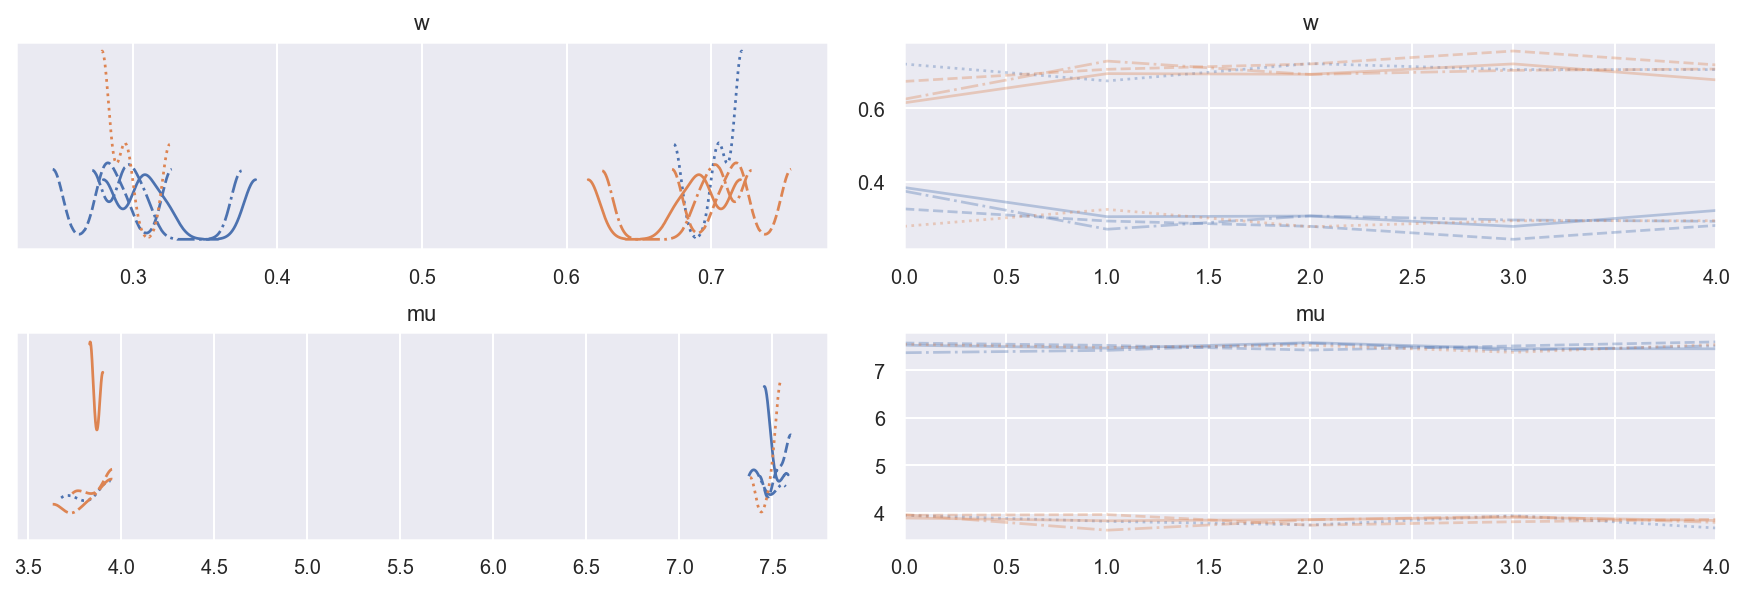

In [305]:
az.plot_trace(idata_pymc3, var_names=["w", "mu"]);

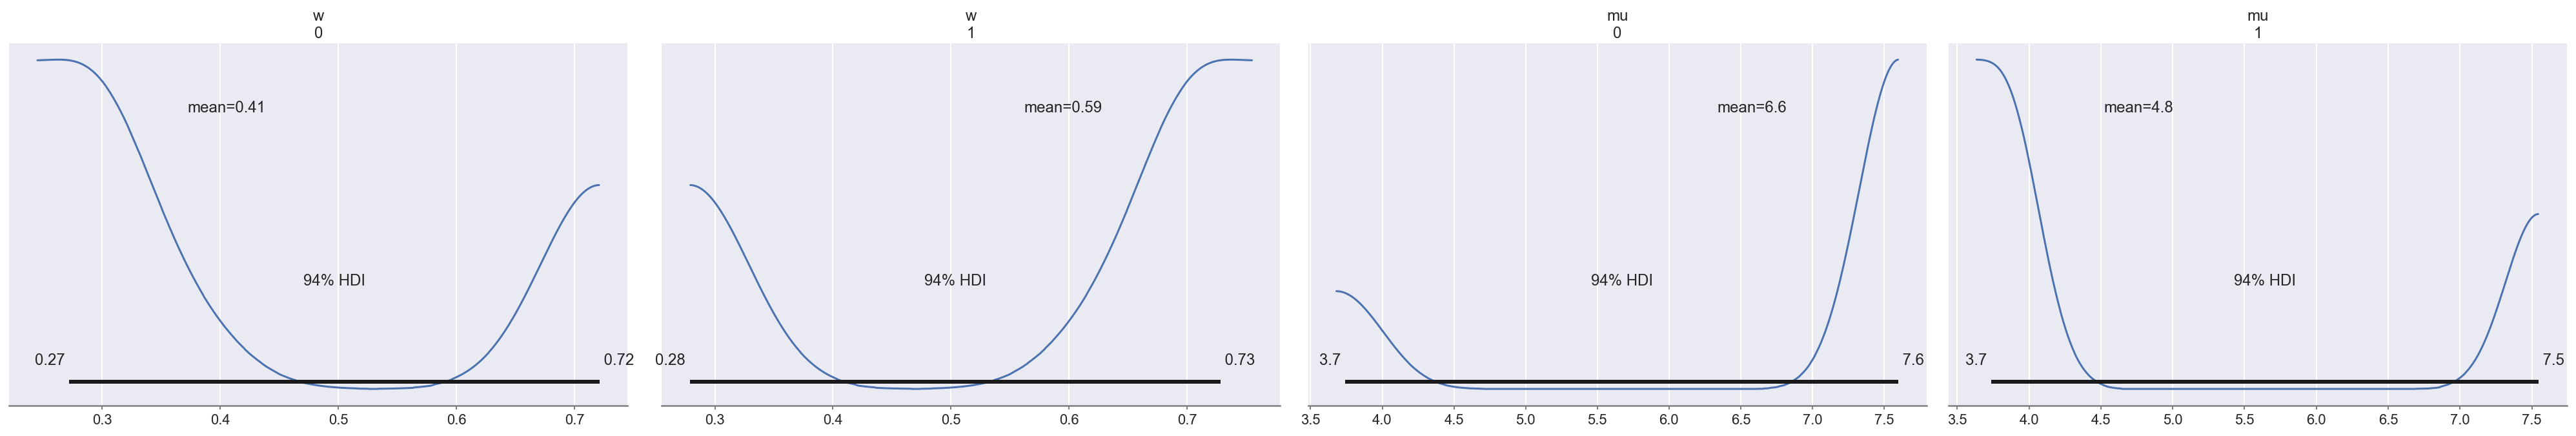

In [306]:
az.plot_posterior(idata_pymc3, var_names=["w", "mu"]);

<AxesSubplot:xlabel='x_obs'>

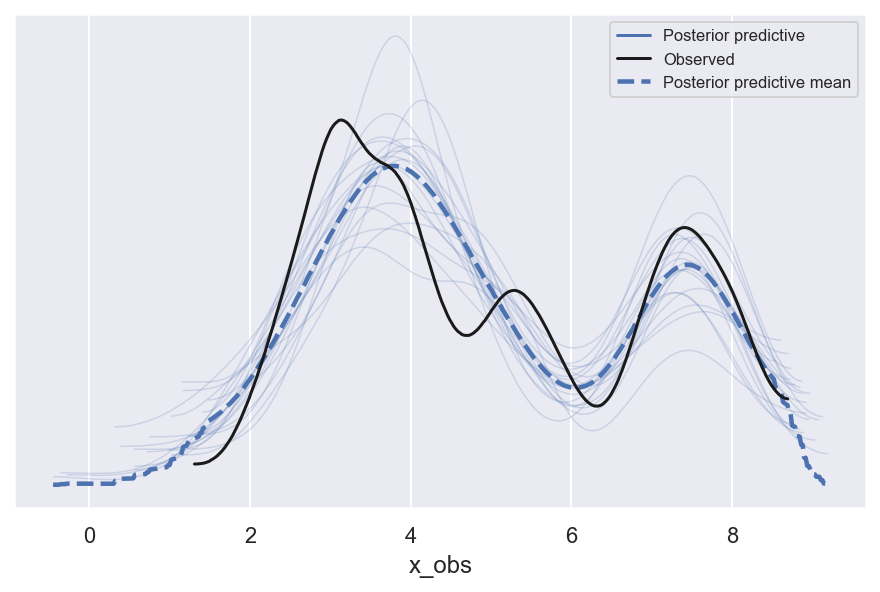

In [307]:
az.plot_ppc(idata_pymc3)

In [378]:
ppc_trace['x_obs'].shape

(20, 261)

In [434]:
prate_sample = ppc_trace['x_obs'].reshape(-1)

(array([12., 18., 40., 47., 31., 22.,  5., 32., 45.,  9.]),
 array([1.39127511, 2.11948241, 2.84768971, 3.575897  , 4.3041043 ,
        5.0323116 , 5.76051889, 6.48872619, 7.21693349, 7.94514078,
        8.67334808]),
 <BarContainer object of 10 artists>)

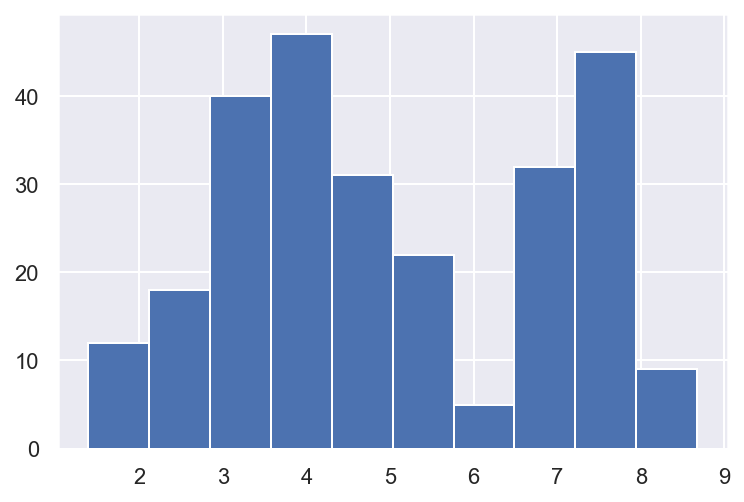

In [286]:
plt.hist(ppc_trace['x_obs'][3])

(array([[0., 0., 2., ..., 2., 4., 0.],
        [0., 1., 2., ..., 4., 3., 0.],
        [0., 0., 2., ..., 2., 0., 0.],
        ...,
        [0., 0., 1., ..., 5., 1., 0.],
        [0., 1., 0., ..., 2., 3., 1.],
        [0., 0., 0., ..., 4., 4., 0.]]),
 array([-0.53018976,  0.46796927,  1.46612831,  2.46428734,  3.46244638,
         4.46060541,  5.45876445,  6.45692348,  7.45508252,  8.45324155,
         9.45140059]),
 <a list of 261 BarContainer objects>)

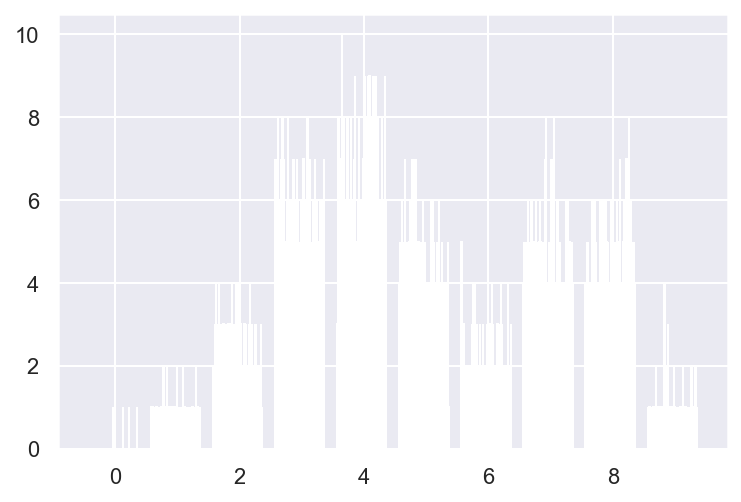

In [288]:
plt.hist(ppc_trace['x_obs'])

In [502]:
prate_sample.shape
prate_sample[100:120]

array([8.16360403, 4.04425875, 5.24388694, 4.89171415, 6.63910229,
       7.076094  , 5.74908199, 6.56030277, 4.00719962, 4.52535592,
       6.83739783, 2.8913633 , 4.02043538, 4.2652803 , 7.42594958,
       3.09207718, 4.87393934, 2.74113292, 6.74446195, 2.63773633])

In [503]:
gender_sample.shape
gender_sample[100:120]

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0])

In [504]:
clin_sample.shape
clin_sample[100:120]

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1])

In [506]:
dept_sample.shape
dept_sample[100:120]

array([5, 4, 5, 5, 2, 5, 4, 3, 2, 1, 1, 2, 6, 1, 2, 5, 4, 5, 2, 1])

In [507]:
exper_sample.shape
exper_sample[100:120]

array([ 6, 10,  9,  5, 15, 16, 10,  6, 27,  5,  9,  5, 18,  8,  9,  5, 12,
        5, 10,  9])

In [508]:
cert_sample.shape
cert_sample[100:120]

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1])

In [510]:
sample_df =pd.DataFrame(np.array([dept_sample, gender_sample,clin_sample,cert_sample,  prate_sample, exper_sample]),
                   columns=['Dept', 'Gender','Clin', 'Cert', 'Prate', 'Exper'])

ValueError: Shape of passed values is (6, 5220), indices imply (6, 6)

In [515]:

data = {'Dept': dept_sample,
        'Gender': gender_sample,
           'Clin':clin_sample,
           'Cert': cert_sample,
           'Prate':prate_sample,
           'Exper': exper_sample
        }

sample_df = pd.DataFrame(data, columns = ['Dept', 'Gender','Clin', 'Cert', 'Prate', 'Exper'])

print(sample_df)

      Dept  Gender  Clin  Cert     Prate  Exper
0        4       0     1     0  5.041016     17
1        4       0     0     1  6.793797     27
2        4       0     1     0  4.457038      4
3        6       1     0     1  4.315588      6
4        5       0     0     0  3.671892     27
...    ...     ...   ...   ...       ...    ...
5215     6       1     1     0  4.883572      6
5216     2       0     1     1  6.618481     11
5217     6       1     1     0  3.433523     16
5218     1       0     1     1  8.122258      8
5219     5       1     1     1  7.095928      9

[5220 rows x 6 columns]


In [517]:
sample_df.to_csv('sample_df.csv', index=False)